# Mobile price prediction based on their specifications


# LinearRegression model

In [7]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

Description:-
    
    Features:

fc=field communication
four_g =4G or not
m_dep = mobile depth in cm
sc_h =synchoronization
pc= processsor

In [40]:
#Reading the csv file....
d1=pd.read_csv(r"C:\Users\saimo\Desktop\tefoLogic_Training_1\5_Projects\Mobile_price_prediction_project_1\mobile_price.csv")
d1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
#finding first 5 rows
d1.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
#below 5 rows
d1.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [11]:
#finding rows & columns
d1.shape

(2000, 21)

In [12]:
list(d1)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [13]:
#Statistical information
d1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
#finding datatypes
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
#finding unique values
d1.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [16]:
#Finding null values
d1.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [17]:
#grouping single column
A=d1.groupby(['battery_power']).count()
A

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,,,,,,,,,,,,,,,,,,,,
501,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
502,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
503,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
504,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
506,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1995,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1996,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [18]:
B=d1.groupby(['touch_screen']).count()
B

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
touch_screen,,,,,,,,,,,,,,,,,,,,
0,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994
1,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006


# data visualization

# Histogram ploting

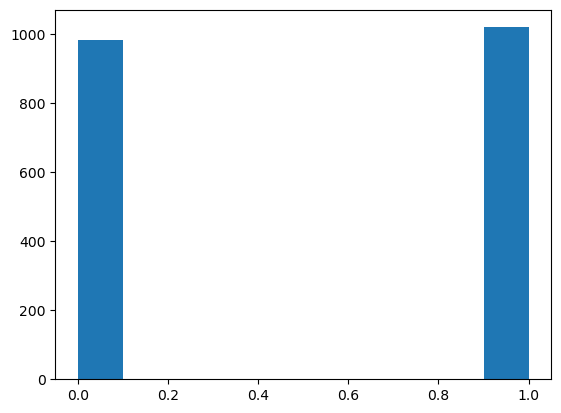

In [19]:

import matplotlib.pyplot as plt
plt.hist(d1['dual_sim'])
plt.show()

# piechart

In [20]:

labels= ['Supported 3G', ' Not-Supported']
values=d1['three_g'].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

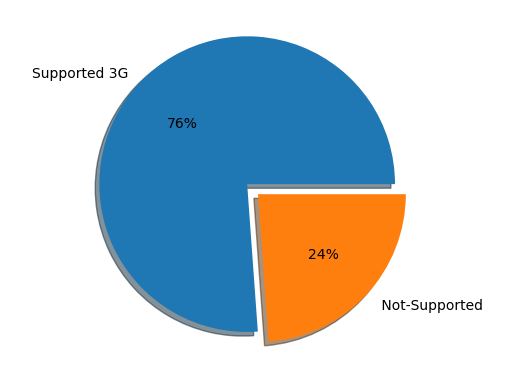

In [21]:
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

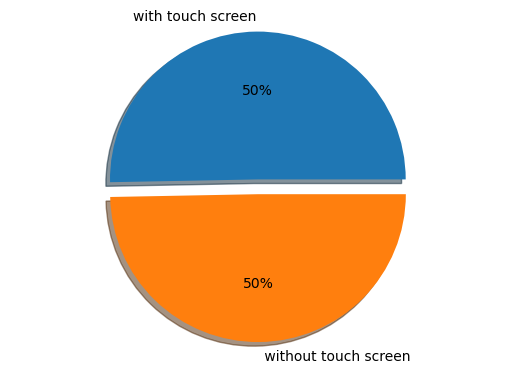

In [22]:
labels= ['with touch screen', ' without touch screen']
values=d1['touch_screen'].value_counts().values

plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

In [23]:
d1['price_range'].unique()

#0k, 10k,20k,30k

array([1, 2, 3, 0], dtype=int64)

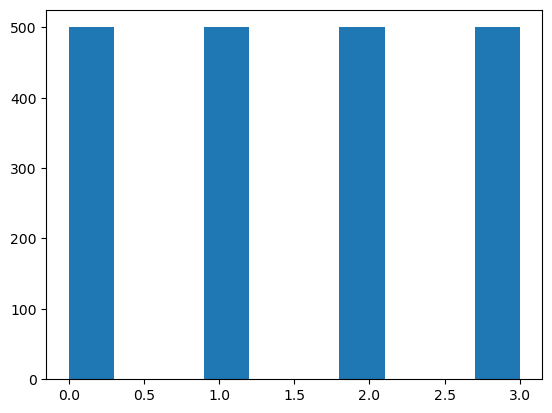

In [24]:
# visulization
import matplotlib.pyplot as plt
plt.hist(d1['price_range'])
plt.show()

# data cleaning

In [25]:


d2=d1.drop([
 'blue',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'n_cores',
 'px_height',
 'px_width',
 'sc_h',
 'sc_w',
 'talk_time',],axis=1)
d2

,battery_power,dual_sim,four_g,mobile_wt,pc,ram,three_g,touch_screen,wifi,price_range
0,842,0,0,188,2,2549,0,0,1,1
1,1021,1,1,136,6,2631,1,1,0,2
2,563,1,1,145,6,2603,1,1,0,2
3,615,0,0,131,9,2769,1,0,0,2
4,1821,0,1,141,14,1411,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,14,668,1,1,0,0
1996,1965,1,0,187,3,2032,1,1,1,2
1997,1911,1,1,108,3,3057,1,1,0,3
1998,1512,0,1,145,5,869,1,1,1,0


In [26]:
#Removing the target variable 
y=d2["price_range"] #target var,dependent variable
x=d2.drop(["price_range"],axis=1) #features,independent variable

In [27]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [28]:
x

,battery_power,dual_sim,four_g,mobile_wt,pc,ram,three_g,touch_screen,wifi
0,842,0,0,188,2,2549,0,0,1
1,1021,1,1,136,6,2631,1,1,0
2,563,1,1,145,6,2603,1,1,0
3,615,0,0,131,9,2769,1,0,0
4,1821,0,1,141,14,1411,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,14,668,1,1,0
1996,1965,1,0,187,3,2032,1,1,1
1997,1911,1,1,108,3,3057,1,1,0
1998,1512,0,1,145,5,869,1,1,1


# split the data into 2 types

In [29]:
#train = 67 %
#test  = 33 %
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [30]:
x_train.shape

(1340, 9)

In [31]:
y_train.shape

(1340,)

In [32]:
x_test.shape

(660, 9)

In [33]:
y_test.shape

(660,)

# LinearRegression model

In [34]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
# checking 
n=reg.predict([[842,0,0,188,2,2549,0,0,1]])
n

array([1.63373453])

In [36]:
a=reg.predict(x_test)
a

array([ 2.67449160e-01,  4.85811274e-01,  1.01162466e+00,  3.85695664e-01,
        2.46997240e+00,  1.34616578e+00,  3.49405733e-01,  2.14652220e+00,
        1.73804847e+00,  3.55294718e+00,  1.02315281e-01,  3.20215816e+00,
        1.07437023e+00,  8.63281417e-01,  2.52738561e+00, -1.36382049e-01,
        4.02488901e-01,  1.22687735e+00,  1.13141931e+00,  1.74600602e+00,
        3.07136848e+00,  2.84275191e+00,  8.26390810e-01,  1.90733652e+00,
        3.04281578e+00,  1.58048251e+00,  1.95867152e+00,  2.02448815e+00,
        1.42694142e+00,  1.90177867e+00,  1.80357963e+00,  6.65038827e-01,
        2.30586788e+00, -2.12108901e-01,  3.49472015e+00,  2.50087419e+00,
        2.97553568e-01,  6.91146188e-02,  7.81412666e-01,  4.97782607e-01,
        1.17123583e+00,  6.55297159e-01,  2.23052988e+00,  1.02301144e+00,
       -1.18613788e-01,  6.84485791e-01,  2.42353103e+00,  1.89387177e+00,
        1.46352130e+00,  2.34915570e+00,  1.69995966e+00,  2.63445686e+00,
        9.70497765e-01,  

In [37]:
a.shape

(660,)

# Accuracy

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,a)

0.8689304755436346

# mean_squared_error

In [39]:
from sklearn.metrics import mean_squared_error  #calculating MSE
mean_squared_error(a,y_test)

0.1552927131543343